In [ ]:
pip install --upgrade matplotlib


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from nltk.stem.porter import PorterStemmer
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import word2vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv("Modified_SQL_Dataset.csv")

In [3]:
data.dropna(inplace=True)

In [4]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [5]:
# Kết hợp tất cả các bảng đã nêu ở trên
from tqdm import tqdm
preprocessed_query = []
lemmatizer = WordNetLemmatizer()
# tqdm để hiển thị thanh trạng thái
for sentance in tqdm(data['Query'].values):
    sentance = re.sub('[^A-Za-z0-9]+', ' ', sentance)
    sentance = re.sub(r',', ' ', sentance)
    #https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
    tokenization = nltk.word_tokenize(sentance)
    sentance = ' '.join([lemmatizer.lemmatize(w) for w in tokenization])
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_query.append(sentance.strip())

100%|██████████| 30919/30919 [00:04<00:00, 6663.98it/s] 


In [6]:
preprocessed_query

['pg sleep time',
 'create user name identified pass123 temporary tablespace temp default tablespace user',
 '1 utl inaddr get host address select distinct table name select distinct table name rownum limit sys table limit 5',
 'select user id 1 1 1 union select 1 version 1',
 'select user id 1 1 union select 1 version 1',
 'select name syscolumns id select id sysobjects name tablename',
 'select user id 1 1 1 1',
 '1 load file char 47 101 116 99 47 112 97 115 115 119 100 1 1 1',
 'select user id 1 1 1 union select 1 version 1',
 'select user id 1 union select 1 version 1',
 '1 1',
 '',
 'admin 1 1',
 'select user id 1 1 1 1',
 '1 1',
 '1 utl inaddr get host address select distinct column name select distinct column name rownum limit tab column limit 5',
 'select user id 1 union select 1 version 1',
 'select user id 1 1 1 1',
 'select user id 1 1 1 1',
 'distinct',
 'select user id 1 1 1 1',
 '1 ascii lower substring select top 1 name sysobjects xtype u 1 1 116',
 'select user id 1 1 1

In [7]:
data['Query'] = preprocessed_query
data.head()

,Query,Label
0,pg sleep time,1
1,create user name identified pass123 temporary ...,1
2,1 utl inaddr get host address select distinct ...,1
3,select user id 1 1 1 union select 1 version 1,1
4,select user id 1 1 union select 1 version 1,1


Unigram là cách mặc định trong CountVectorizer, chỉ định CountVectorizer(), nó sẽ tự động tạo ra BOW với unigram hoặc ngram_range=(1, 1).
Nếu muốn tạo ra BOW với bigram hoặc n-gram, có thể sử dụng tham số ngram_range khi khởi tạo CountVectorizer. 
Ví dụ: CountVectorizer(ngram_range=(1, 2)) sẽ tạo ra cả unigram và bigram.

In [8]:
# Chuyển đổi thành Bag of Words (BoW)
count_vect = CountVectorizer(ngram_range=(1, 1))
X_train_counts = count_vect.fit_transform(preprocessed_query)

# Lấy tên các đặc trưng
feature_names = count_vect.get_feature_names_out()
print(f"Feature names (first 10): {feature_names[:10]}")
print(f"Shape of the feature matrix: {X_train_counts.shape}")

# Chuyển BoW thành DataFrame
bow_df = pd.DataFrame(X_train_counts.toarray(), columns=feature_names)
print(bow_df.head(10))

Feature names (first 10): ['00' '000001' '000003' '000004' '000023' '000045' '00033926r' '00041731d'
 '00207473j' '00217e']
Shape of the feature matrix: (30919, 24462)
   00  000001  000003  000004  000023  000045  00033926r  00041731d  \
0   0       0       0       0       0       0          0          0   
1   0       0       0       0       0       0          0          0   
2   0       0       0       0       0       0          0          0   
3   0       0       0       0       0       0          0          0   
4   0       0       0       0       0       0          0          0   
5   0       0       0       0       0       0          0          0   
6   0       0       0       0       0       0          0          0   
7   0       0       0       0       0       0          0          0   
8   0       0       0       0       0       0          0          0   
9   0       0       0       0       0       0          0          0   

   00207473j  00217e  ...  zytel  zyuo  zyvk  zzca

In [9]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
# Giả sử bạn có một cột 'Label' trong dữ liệu để làm nhãn cho bài toán phân loại
X = X_train_counts
y = data['Label']  # Thay đổi cho phù hợp với cột nhãn trong dữ liệu của bạn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (24735, 24462)
X_test shape: (6184, 24462)
y_train shape: (24735,)
y_test shape: (6184,)


<h2> Áp dụng SVM cho Unigram BOW </h2>


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Khởi tạo mô hình SVM
svm = SVC(kernel='linear')

# Huấn luyện mô hình
svm.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_svm = svm.predict(X_test)

# Đánh giá mô hình
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))


Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3893
           1       0.99      0.83      0.90      2291

    accuracy                           0.93      6184
   macro avg       0.95      0.91      0.93      6184
weighted avg       0.94      0.93      0.93      6184



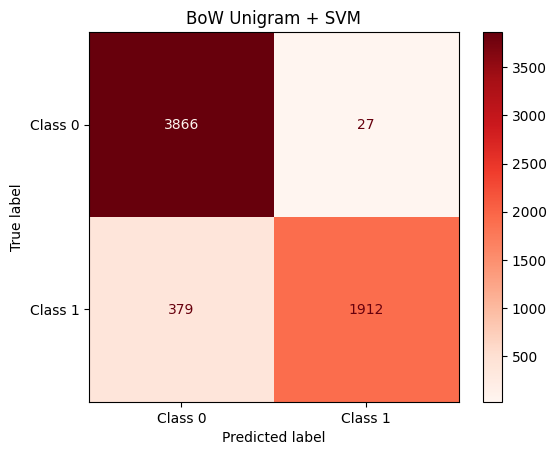

In [23]:
# Sử dụng ConfusionMatrixDisplay để hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Reds')
plt.title('BoW Unigram + SVM')
plt.show()

<h2> Áp dụng NB cho Unigram BOW </h2>


Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3893
           1       0.97      0.89      0.93      2291

    accuracy                           0.95      6184
   macro avg       0.95      0.94      0.94      6184
weighted avg       0.95      0.95      0.95      6184



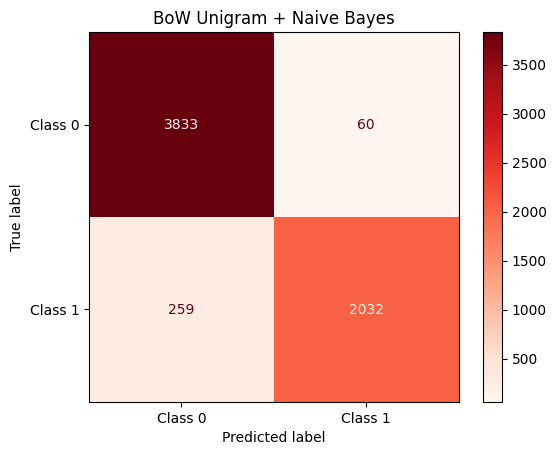

In [34]:
from sklearn.naive_bayes import MultinomialNB

# Khởi tạo mô hình Naive Bayes
nb = MultinomialNB()

# Huấn luyện mô hình
nb.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_nb = nb.predict(X_test)

# Đánh giá mô hình
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

# Vẽ ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nb, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Reds')
plt.title('BoW Unigram + Naive Bayes')
plt.show()


<h2> Áp dụng KNN cho Unigram BOW </h2>


Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.97      0.58      0.72      3893
           1       0.58      0.97      0.72      2291

    accuracy                           0.72      6184
   macro avg       0.77      0.77      0.72      6184
weighted avg       0.83      0.72      0.72      6184



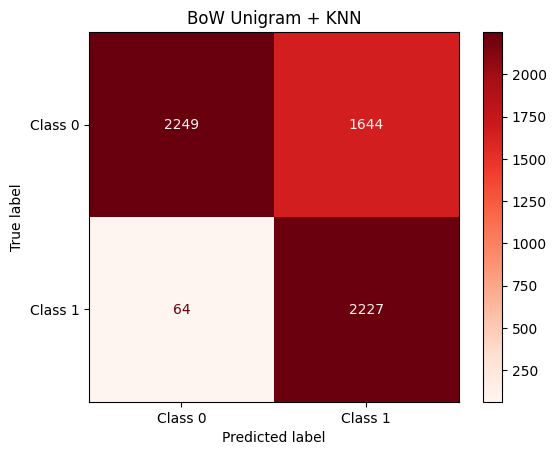

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Hoặc bạn có thể sử dụng GridSearchCV như trước

# Huấn luyện mô hình
knn.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_knn = knn.predict(X_test)

# Đánh giá mô hình
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

# Vẽ ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Reds')
plt.title('BoW Unigram + KNN')
plt.show()

<h2> Áp dụng RF cho Unigram BOW </h2>


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.69      0.81      3893
           1       0.65      0.98      0.78      2291

    accuracy                           0.79      6184
   macro avg       0.81      0.83      0.79      6184
weighted avg       0.86      0.79      0.80      6184



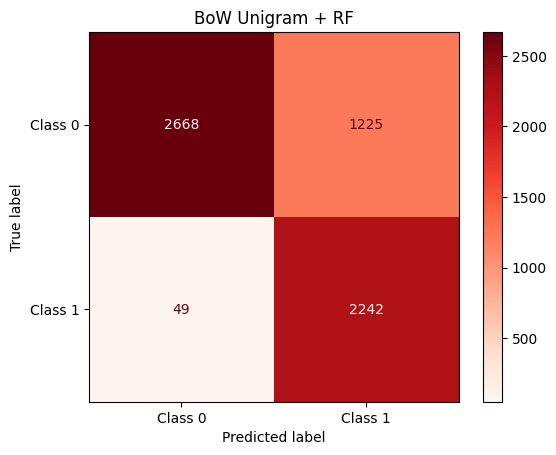

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(n_estimators=100)

# Huấn luyện mô hình
rf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = rf.predict(X_test)

# Đánh giá mô hình
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Vẽ ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Reds')
plt.title('BoW Unigram + RF')
plt.show()


<h2> Áp dụng AdaBoost cho Unigram BOW </h2>


Classification Report (AdaBoost):
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3893
           1       0.97      0.84      0.90      2291

    accuracy                           0.93      6184
   macro avg       0.94      0.91      0.93      6184
weighted avg       0.94      0.93      0.93      6184



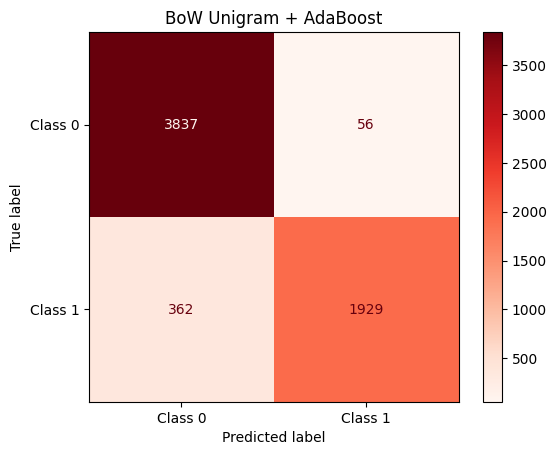

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo mô hình AdaBoost
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)

# Huấn luyện mô hình
ada.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_ada = ada.predict(X_test)

# Đánh giá mô hình
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
print("Classification Report (AdaBoost):")
print(classification_report(y_test, y_pred_ada))

# Vẽ ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ada, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Reds')
plt.title('BoW Unigram + AdaBoost')
plt.show()


<h2> Áp dụng XGBoost cho Unigram BOW </h2>


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3893
           1       0.98      0.86      0.92      2291

    accuracy                           0.94      6184
   macro avg       0.95      0.93      0.94      6184
weighted avg       0.94      0.94      0.94      6184



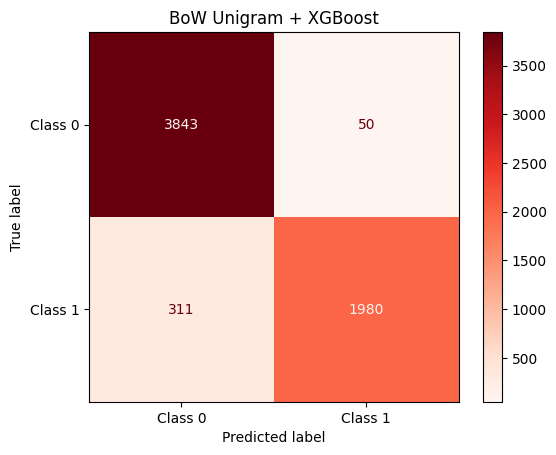

In [38]:
from xgboost import XGBClassifier

# Khởi tạo mô hình XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Huấn luyện mô hình
xgb.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_xgb = xgb.predict(X_test)

# Đánh giá mô hình
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Vẽ ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Reds')
plt.title('BoW Unigram + XGBoost')
plt.show()

In [40]:
pip install prettytable


Note: you may need to restart the kernel to use updated packages.


<h2> Tổng hợp so sánh các F1-score</h2>

In [41]:
from prettytable import PrettyTable

# Tạo bảng PrettyTable
x = PrettyTable()
x.field_names = ["Mô hình (Unigram BOW + ML)", "Train f1_score", "Test f1_score"]

# Thêm giá trị f1-score cho từng mô hình với Bag of Words
x.add_row(["SVM", 0.95, 0.90])        
x.add_row(["Naive Bayes", 0.96, 0.93]) 
x.add_row(["KNN", 0.72, 0.72])         
x.add_row(["Random Forest", 0.81, 0.78]) 
x.add_row(["AdaBoost", 0.95, 0.90])    
x.add_row(["XGBoost", 0.96, 0.92])   

# In bảng tổng hợp f1-score
print(x)

+----------------------------+----------------+---------------+
| Mô hình (Unigram BOW + ML) | Train f1_score | Test f1_score |
+----------------------------+----------------+---------------+
|            SVM             |      0.95      |      0.9      |
|        Naive Bayes         |      0.96      |      0.93     |
|            KNN             |      0.72      |      0.72     |
|       Random Forest        |      0.81      |      0.78     |
|          AdaBoost          |      0.95      |      0.9      |
|          XGBoost           |      0.96      |      0.92     |
+----------------------------+----------------+---------------+
